# Cito Toets 

#### Stap 1 Data verzamelen
* We halen de webpagina op waar eea in wordt uitgelegd, en het excel bestand met alle gegevens.
    * <http://www.rtlnieuws.nl/nieuws/binnenland/hoe-vergelijkt-rtl-nieuws-de-cito-scores-van-2014>
    * <http://www.rtlnieuws.nl/sites/default/files/content/documents/2014/07/07/scholenoverzicht_0.xls>
    
#### Stap 2 Inlezen in pandas, en wat eerste exploratie
* Hier wordt het prima uitgelegd:
    * <http://pbpython.com/pandas-pivot-table-explained.html>

#### Stap 3 Analyse

# Data verzamelen

In [25]:
import pandas as pd
import numpy as np
%matplotlib inline

In [26]:
scholenoverzicht = pd.read_excel("http://maartenmarx.nl/teaching/ISatWork/Data/CitoToets/scholenoverzicht_0.xls")
scholenoverzicht.head()

,BRIN,Vestiging,id,naam,adres,postcode,plaats,gemeente,provincie,denominatie,...,tellerdeelname,noemerdeelname,deelnaamper,meantoets,waretoets,RES1,PRED1,quasicito,verwacht,cijfer
0,23EK,0,23EK00,De Phoenix,Zalmkolk 2,8017 PA,Zwolle,Zwolle,Overijssel,Rooms-Katholiek,...,,,,,,,0.910815,NaN,537.351861,-
1,09CA,0,09CA00,Jan Jaspers,de Meenthe 28,8051 KV,Hattem,Hattem,Gelderland,Protestants-Christelijk,...,29,29,100,-0.46357,-0.46357,-1.01519,0.551622,531.447503,535.808769,-
2,30RP,0,30RP00,De Verbinding,Jan Greshoffstraat 5,3069 WG,Rotterdam,Rotterdam,Zuid-Holland,Algemeen Bijzonder,...,,,,,,,0.178813,NaN,534.207181,-
3,30PN,0,30PN00,EBS Tabitha,Jachthoornlaan 15,7312 CD,Apeldoorn,Apeldoorn,Gelderland,Evangelisch,...,,,,,,,0.415624,NaN,535.224522,-
4,15UF,0,15UF00,obs De Springplank,Beukenstraat 83,8021 XA,Zwolle,Zwolle,Overijssel,Openbaar,...,20.5,23.5,87.234,0.222755,-0.0580963,0.763355,-0.821451,533.189418,529.910046,7.76335


In [27]:
scholenoverzicht_toetsen = scholenoverzicht[['BRIN', 'naam', 'adres', 'postcode', 'plaats', 'gemeente', 'provincie',\
                                     'denominatie', 'visie', 'TOETS_2012', 'SCORE_2012', 'TOETS_2013', 'SCORE_2013', 'TOETS_2014', 'SCORE_2014']]
scholenoverzicht_toetsen.head()

,BRIN,naam,adres,postcode,plaats,gemeente,provincie,denominatie,visie,TOETS_2012,SCORE_2012,TOETS_2013,SCORE_2013,TOETS_2014,SCORE_2014
0,23EK,De Phoenix,Zalmkolk 2,8017 PA,Zwolle,Zwolle,Overijssel,Rooms-Katholiek,Regulier,NaN,,NaN,,andere,
1,09CA,Jan Jaspers,de Meenthe 28,8051 KV,Hattem,Hattem,Gelderland,Protestants-Christelijk,Regulier,NaN,,NaN,,seo,-0.57
2,30RP,De Verbinding,Jan Greshoffstraat 5,3069 WG,Rotterdam,Rotterdam,Zuid-Holland,Algemeen Bijzonder,Regulier,NaN,,NaN,,NaN,
3,30PN,EBS Tabitha,Jachthoornlaan 15,7312 CD,Apeldoorn,Apeldoorn,Gelderland,Evangelisch,Regulier,NaN,,NaN,,andere,
4,15UF,obs De Springplank,Beukenstraat 83,8021 XA,Zwolle,Zwolle,Overijssel,Openbaar,Regulier,NaN,,SEO,-0.43,seo,0.81


In [28]:
scholenoverzicht_cito = scholenoverzicht_toetsen[(scholenoverzicht_toetsen.TOETS_2012 =='cito') & \
                                                    (scholenoverzicht_toetsen.TOETS_2013 =='cito') & \
                                                    (scholenoverzicht_toetsen.TOETS_2014 =='cito')]

scholenoverzicht_cito.head()

,BRIN,naam,adres,postcode,plaats,gemeente,provincie,denominatie,visie,TOETS_2012,SCORE_2012,TOETS_2013,SCORE_2013,TOETS_2014,SCORE_2014
207,07OL,Rotterdamse Schoolvereniging II,Stuart Millpad 84,3076 RK,Rotterdam,Rotterdam,Zuid-Holland,Algemeen Bijzonder,Regulier,cito,546.4,cito,543.5,cito,545.2
208,08XI,Rotterdamse Schoolvereniging Noord,Schiedamsesingel 155,3012 BB,Rotterdam,Rotterdam,Zuid-Holland,Algemeen Bijzonder,Regulier,cito,540.5,cito,543.2,cito,541.2
209,16KZ,Professor Wassenberghschool,Ieborchpaed 6,9081 AR,Lekkum,Leeuwarden,Friesland,Openbaar,Regulier,cito,535,cito,532.8,cito,521.5
210,03HI,de Gereformeerde b.s. Rehoboth,Pompenburgsingel 30,3135 PS,Vlaardingen,Vlaardingen,Zuid-Holland,Gereformeerd Vrijgemaakt,Regulier,cito,535.7,cito,537.2,cito,535.1
211,03BA,Basisschool Jan van Rijckenborgh,'s-Gravesandelaan 15,1222 SX,Hilversum,Hilversum,Noord-Holland,Algemeen Bijzonder,Regulier,cito,540.2,cito,545.8,cito,531.8


In [45]:
scholenoverzicht_citoscores = scholenoverzicht_cito.drop(['TOETS_2012', 'TOETS_2013', 'TOETS_2014'], axis=1).rename(columns = {'BRIN':'BRIN NUMMER'})
scholenoverzicht_citoscores.head()

,BRIN NUMMER,naam,adres,postcode,plaats,gemeente,provincie,denominatie,visie,SCORE_2012,SCORE_2013,SCORE_2014
207,07OL,Rotterdamse Schoolvereniging II,Stuart Millpad 84,3076 RK,Rotterdam,Rotterdam,Zuid-Holland,Algemeen Bijzonder,Regulier,546.4,543.5,545.2
208,08XI,Rotterdamse Schoolvereniging Noord,Schiedamsesingel 155,3012 BB,Rotterdam,Rotterdam,Zuid-Holland,Algemeen Bijzonder,Regulier,540.5,543.2,541.2
209,16KZ,Professor Wassenberghschool,Ieborchpaed 6,9081 AR,Lekkum,Leeuwarden,Friesland,Openbaar,Regulier,535,532.8,521.5
210,03HI,de Gereformeerde b.s. Rehoboth,Pompenburgsingel 30,3135 PS,Vlaardingen,Vlaardingen,Zuid-Holland,Gereformeerd Vrijgemaakt,Regulier,535.7,537.2,535.1
211,03BA,Basisschool Jan van Rijckenborgh,'s-Gravesandelaan 15,1222 SX,Hilversum,Hilversum,Noord-Holland,Algemeen Bijzonder,Regulier,540.2,545.8,531.8


In [30]:
xl_file = pd.ExcelFile('02.Onderwijspersoneel_po_in_fte-2010-2014_.xls', axis=0)

dfs = {sheet_name: xl_file.parse(sheet_name)
       for sheet_name in xl_file.sheet_names}


pers_fte = dfs['per owtype-bestuur-brin-functie'][["BRIN NUMMER", "FUNCTIEGROEP", "FTE'S 2012", "FTE'S 2013", "FTE'S 2014"]]
pers_fte_onderwijsgevend = pers_fte[pers_fte.FUNCTIEGROEP == 'Onderwijsgevend personeel']
pers_fte_onderwijsgevend.head(30)

,BRIN NUMMER,FUNCTIEGROEP,FTE'S 2012,FTE'S 2013,FTE'S 2014
1,16AH,Onderwijsgevend personeel,10.0345,9.1019,10.2489
3,16BX,Onderwijsgevend personeel,3.7861,3.7830,3.7830
6,16DJ,Onderwijsgevend personeel,4.0894,4.6451,4.7808
8,16HI,Onderwijsgevend personeel,8.0842,6.7786,6.6984
10,16MA,Onderwijsgevend personeel,25.5978,23.5600,25.1079
13,16NR,Onderwijsgevend personeel,11.4994,15.2640,12.1381
15,16UA,Onderwijsgevend personeel,9.5409,9.4522,8.4784
18,16WN,Onderwijsgevend personeel,5.5566,4.7336,3.7220
21,16XQ,Onderwijsgevend personeel,16.0790,15.7023,18.3906
24,16YK,Onderwijsgevend personeel,6.1597,6.1597,6.2530


In [31]:
leerlingen1213 = pd.read_excel("01. Leerlingen bo - leerlinggewicht en schoolgewicht- 2012-2013.xls")
leerlingen1213_tot = leerlingen1213[['BRIN NUMMER', 'TOTAAL']]
leerlingen1213_tot = leerlingen1213_tot.rename(columns = {'TOTAAL':'TOTAAL 2012-2013'})
leerlingen1314 = pd.read_excel("01. Leerlingen bo - leerlinggewicht en schoolgewicht- 2013-2014.xls")
leerlingen1314_tot = leerlingen1314[['BRIN NUMMER', 'TOTAAL']]
leerlingen1314_tot = leerlingen1314_tot.rename(columns = {'TOTAAL':'TOTAAL 2013-2014'})
leerlingen1415 = pd.read_excel("01. Leerlingen bo - leerlinggewicht en schoolgewicht- 2014-2015.xls")
leerlingen1415_tot = leerlingen1415[['BRIN_NUMMER', 'TOTAAL']]
leerlingen1415_tot = leerlingen1415_tot.rename(columns = {'TOTAAL':'TOTAAL 2014-2015'})
leerlingen1415_tot = leerlingen1415_tot.rename(columns = {'BRIN_NUMMER':'BRIN NUMMER'})

In [32]:
leerlingen_tot = pd.merge(pd.merge(leerlingen1213_tot,leerlingen1314_tot,on='BRIN NUMMER'),leerlingen1415_tot,on='BRIN NUMMER')
leerlingen_tot.head()

,BRIN NUMMER,TOTAAL 2012-2013,TOTAAL 2013-2014,TOTAAL 2014-2015
0,00AP,94,96,88
1,00AR,150,143,141
2,00AV,58,58,59
3,00AZ,77,79,133
4,00BA,117,113,106


In [33]:
fte_leerlingen = pd.merge(leerlingen_tot, pers_fte_onderwijsgevend,on='BRIN NUMMER')
fte_leerlingen = fte_leerlingen.drop('FUNCTIEGROEP', axis=1)
fte_leerlingen.head()

,BRIN NUMMER,TOTAAL 2012-2013,TOTAAL 2013-2014,TOTAAL 2014-2015,FTE'S 2012,FTE'S 2013,FTE'S 2014
0,00AP,94,96,88,3.6178,4.0381,4.1248
1,00AR,150,143,141,7.8546,7.9405,8.0966
2,00AV,58,58,59,3.7080,4.0251,4.6444
3,00AZ,77,79,133,10.9558,8.6015,8.0380
4,00BA,117,113,106,6.3295,7.0346,6.3348


In [34]:
fte_leerlingen['Leerlingen per fte 2012-2013'] = fte_leerlingen['TOTAAL 2012-2013'] / fte_leerlingen["FTE'S 2012"]
fte_leerlingen['Leerlingen per fte 2013-2014'] = fte_leerlingen['TOTAAL 2013-2014'] / fte_leerlingen["FTE'S 2013"]
fte_leerlingen['Leerlingen per fte 2014-2015'] = fte_leerlingen['TOTAAL 2014-2015'] / fte_leerlingen["FTE'S 2014"]

fte_leerlingen.head(20)

,BRIN NUMMER,TOTAAL 2012-2013,TOTAAL 2013-2014,TOTAAL 2014-2015,FTE'S 2012,FTE'S 2013,FTE'S 2014,Leerlingen per fte 2012-2013,Leerlingen per fte 2013-2014,Leerlingen per fte 2014-2015
0,00AP,94,96,88,3.6178,4.038100,4.1248,25.982641,23.773557,21.334368
1,00AR,150,143,141,7.8546,7.940500,8.0966,19.097090,18.008942,17.414717
2,00AV,58,58,59,3.7080,4.025100,4.6444,15.641855,14.409580,12.703471
3,00AZ,77,79,133,10.9558,8.601500,8.0380,7.028241,9.184445,16.546405
4,00BA,117,113,106,6.3295,7.034600,6.3348,18.484872,16.063458,16.732967
5,00BB,109,103,98,9.0515,10.905791,6.4256,12.042203,9.444523,15.251494
6,00BS,127,127,128,5.7147,5.081900,5.0669,22.223389,24.990653,25.261995
7,00BW,95,86,98,10.9904,9.740900,8.6284,8.643907,8.828753,11.357842
8,00CD,191,179,160,8.6081,9.603000,7.0035,22.188404,18.640008,22.845720
9,00CG,371,378,389,21.9891,19.046900,19.3149,16.871996,19.845749,20.139892


In [35]:
fte_leerlingen_av = fte_leerlingen[['BRIN NUMMER', 'Leerlingen per fte 2012-2013', 'Leerlingen per fte 2013-2014', 'Leerlingen per fte 2014-2015']]
fte_leerlingen_av.head()

,BRIN NUMMER,Leerlingen per fte 2012-2013,Leerlingen per fte 2013-2014,Leerlingen per fte 2014-2015
0,00AP,25.982641,23.773557,21.334368
1,00AR,19.097090,18.008942,17.414717
2,00AV,15.641855,14.409580,12.703471
3,00AZ,7.028241,9.184445,16.546405
4,00BA,18.484872,16.063458,16.732967


In [48]:
fte_cito = pd.merge(scholenoverzicht_citoscores, fte_leerlingen_av, on='BRIN NUMMER')
fte_cito.head(100)

,BRIN NUMMER,naam,adres,postcode,plaats,gemeente,provincie,denominatie,visie,SCORE_2012,SCORE_2013,SCORE_2014,Leerlingen per fte 2012-2013,Leerlingen per fte 2013-2014,Leerlingen per fte 2014-2015
0,07OL,Rotterdamse Schoolvereniging II,Stuart Millpad 84,3076 RK,Rotterdam,Rotterdam,Zuid-Holland,Algemeen Bijzonder,Regulier,546.4,543.5,545.2,19.827877,20.093074,19.976239
1,08XI,Rotterdamse Schoolvereniging Noord,Schiedamsesingel 155,3012 BB,Rotterdam,Rotterdam,Zuid-Holland,Algemeen Bijzonder,Regulier,540.5,543.2,541.2,17.270137,19.417168,20.138852
2,16KZ,Professor Wassenberghschool,Ieborchpaed 6,9081 AR,Lekkum,Leeuwarden,Friesland,Openbaar,Regulier,535,532.8,521.5,25.194205,22.782349,23.824626
3,03HI,de Gereformeerde b.s. Rehoboth,Pompenburgsingel 30,3135 PS,Vlaardingen,Vlaardingen,Zuid-Holland,Gereformeerd Vrijgemaakt,Regulier,535.7,537.2,535.1,20.540911,20.425671,18.835182
4,03BA,Basisschool Jan van Rijckenborgh,'s-Gravesandelaan 15,1222 SX,Hilversum,Hilversum,Noord-Holland,Algemeen Bijzonder,Regulier,540.2,545.8,531.8,19.320171,14.965382,15.344614
5,09JG,Gereformeerde basisschool Joh. Calvijn,Froukemaheerd 1,9736 RA,Groningen,Groningen,Groningen,Gereformeerd Vrijgemaakt,Regulier,539.3,543.6,540.1,23.202823,22.167234,20.613065
6,03JD,Basisschool Pieter Jongeling,Zijpendaalseweg 163,6814 CJ,Arnhem,Arnhem,Gelderland,Gereformeerd Vrijgemaakt,Regulier,539.7,538.4,536.8,21.836751,22.716599,21.490251
7,06EN,Geref. basisschool Het Baken,Stuurboordlaan 1,9934 JN,Delfzijl,Delfzijl,Groningen,Gereformeerd Vrijgemaakt,Regulier,537.3,538.3,532.2,15.093884,15.203005,15.414571
8,04FM,Capelse Schoolvereniging,Alkenlaan 91,2903 EB,Capelle aan den IJssel,Capelle aan den IJssel,Zuid-Holland,Algemeen Bijzonder,Regulier,539.9,543.2,538.9,19.297080,17.811025,18.073904
9,00AP,Basisschool De Schanskorf,Overwater 1-3,2715 BT,Zoetermeer,Zoetermeer,Zuid-Holland,Gereformeerd Vrijgemaakt,Regulier,539,538.1,531.8,25.982641,23.773557,21.334368


## Correlatie tussen cito score en inkomen

In [111]:
cito_fte_corr12 = fte_cito[['SCORE_2012','Leerlingen per fte 2012-2013']]

cito_fte_corr12['SCORE_2012'] = pd.to_numeric(cito_fte_corr12['SCORE_2012'], errors='coerce')

cito_fte_corr12.head(20)


C:\Users\Eline\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,SCORE_2012,Leerlingen per fte 2012-2013
0,546.4,19.827877
1,540.5,17.270137
2,535.0,25.194205
3,535.7,20.540911
4,540.2,19.320171
5,539.3,23.202823
6,539.7,21.836751
7,537.3,15.093884
8,539.9,19.297080
9,539.0,25.982641


In [114]:
cito_fte_corr12_plot = cito_fte_corr12[pd.notnull(cito_fte_corr12['SCORE_2012'])]
cito_fte_corr12_plot.head(20)

,SCORE_2012,Leerlingen per fte 2012-2013
0,546.4,19.827877
1,540.5,17.270137
2,535.0,25.194205
3,535.7,20.540911
4,540.2,19.320171
5,539.3,23.202823
6,539.7,21.836751
7,537.3,15.093884
8,539.9,19.297080
9,539.0,25.982641


Pearson Correlation (R)


,SCORE_2012,Leerlingen per fte 2012-2013
SCORE_2012,1.000000,0.266278
Leerlingen per fte 2012-2013,0.266278,1.000000


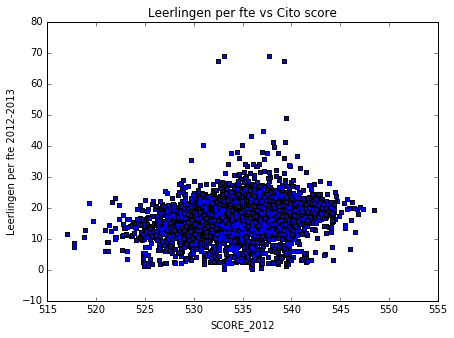

In [125]:
## Correlatie tussen cito score en Leerlingen per fte
cito_fte_corr12.plot(kind='scatter', marker='s', figsize=(7, 5), x = 'SCORE_2012', y = 'Leerlingen per fte 2012-2013', title= 'Leerlingen per fte vs Cito score')

# Correlation
print 'Pearson Correlation (R)'
cito_fte_corr12.corr(method='pearson')